In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'E:\Projects\Full customer data analysis\data\merged_data.csv')

In [3]:
data.drop("Unnamed: 0", axis = 1)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
824359,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
824360,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
824361,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
824362,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
data.isna().sum()

Unnamed: 0     0
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [6]:
data['InvoiceDate'] = data['InvoiceDate'].dt.date

In [7]:
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
824359,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
824360,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
824361,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France
824362,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France


In [8]:
temp = data.groupby(['Country'])['Country'].value_counts()

In [9]:
temp.sort_values(ascending=False)

Country
United Kingdom          741301
Germany                  17624
EIRE                     16195
France                   14202
Netherlands               5140
Spain                     3811
Belgium                   3123
Switzerland               3064
Portugal                  2504
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1345
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Greece                     663
Japan                      582
Poland                     535
USA                        535
Unspecified                524
United Arab Emirates       386
Singapore                  346
Israel                     324
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        123
Brazil                      94


##### Only enough data for Britain, Germany, EIRE, France

In [10]:
countries = ['United Kingdom', 'Germany', 'EIRE', 'France']
countryWiseData = {}
for country in countries:
    temp = data[data['Country'] == country]
    countryWiseData[country] = temp

In [11]:
for country in countryWiseData.keys():
    countryWiseData[country] = countryWiseData.get(country).drop('Unnamed: 0',axis = 1)

In [12]:
countryWiseData['United Kingdom']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
824343,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09,1.95,15804.0,United Kingdom
824344,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09,2.95,13113.0,United Kingdom
824345,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09,1.25,13113.0,United Kingdom
824346,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09,8.95,13113.0,United Kingdom


In [13]:
for country in countryWiseData.keys():
    temp = countryWiseData.get(country)
    temp['Sales'] = temp['Quantity'] * temp['Price']
    temp = temp.groupby(by = 'InvoiceDate', as_index= False)['Sales'].sum()
    temp.set_index('InvoiceDate',inplace=True)
    countryWiseData[country] = temp

In [14]:
with open(r"E:\Projects\Full customer data analysis\data\countryWiseSalesData.pkl", 'wb') as f:
    pkl.dump(countryWiseData,f)

In [15]:
def plot_data(dataframe : pd.DataFrame,country):
    plt.figure(figsize = (11, 6))
    plt.plot(dataframe.index , dataframe['Sales'])

    plt.title(f'Sales Over Time {country}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)

    plt.xticks(rotation=45)

    plt.grid(True)
    plt.show()

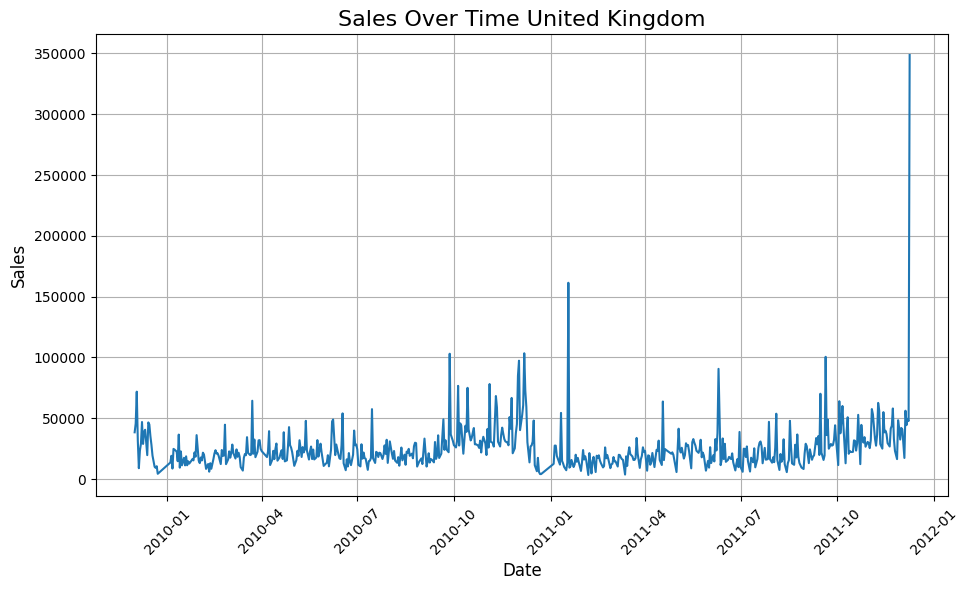

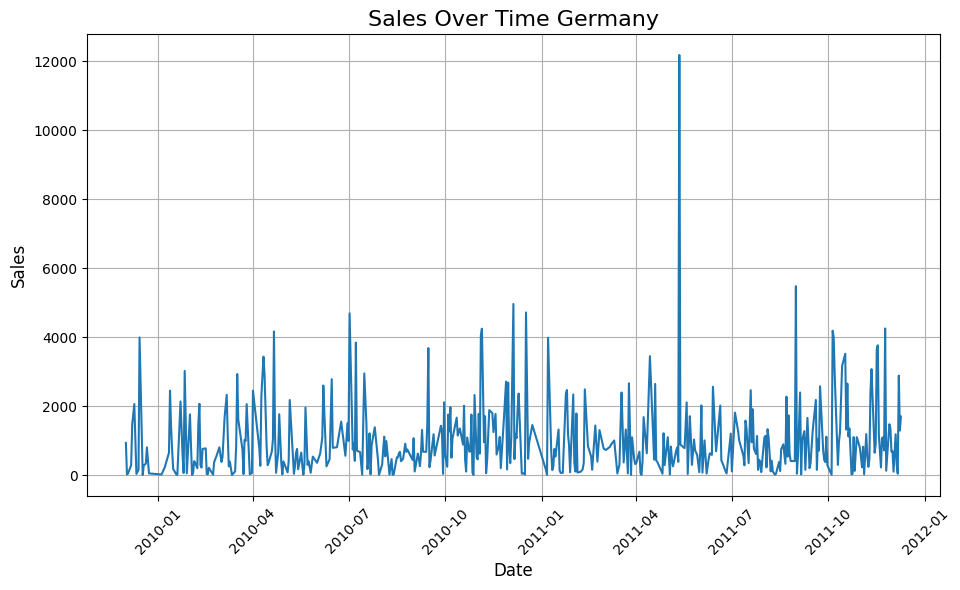

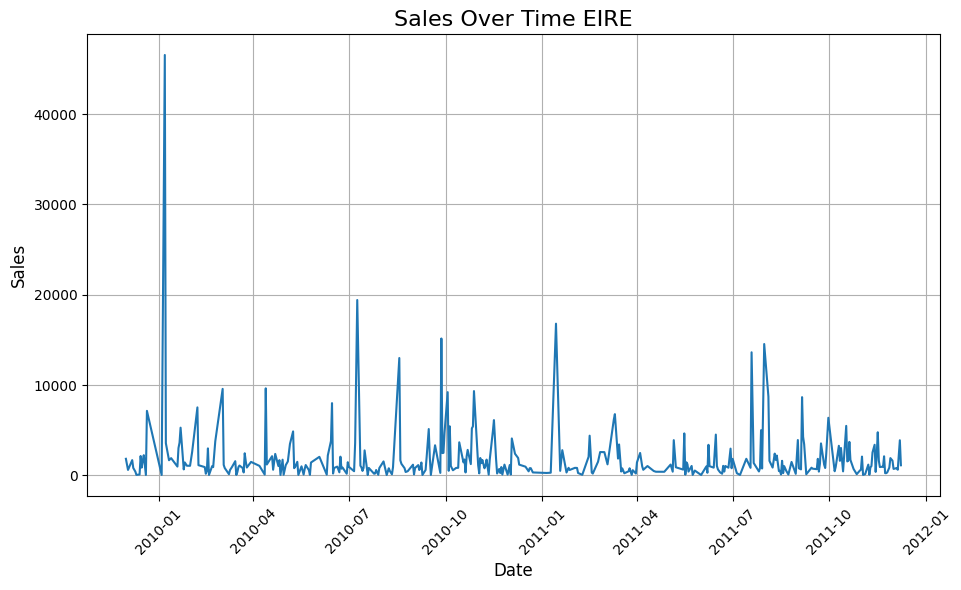

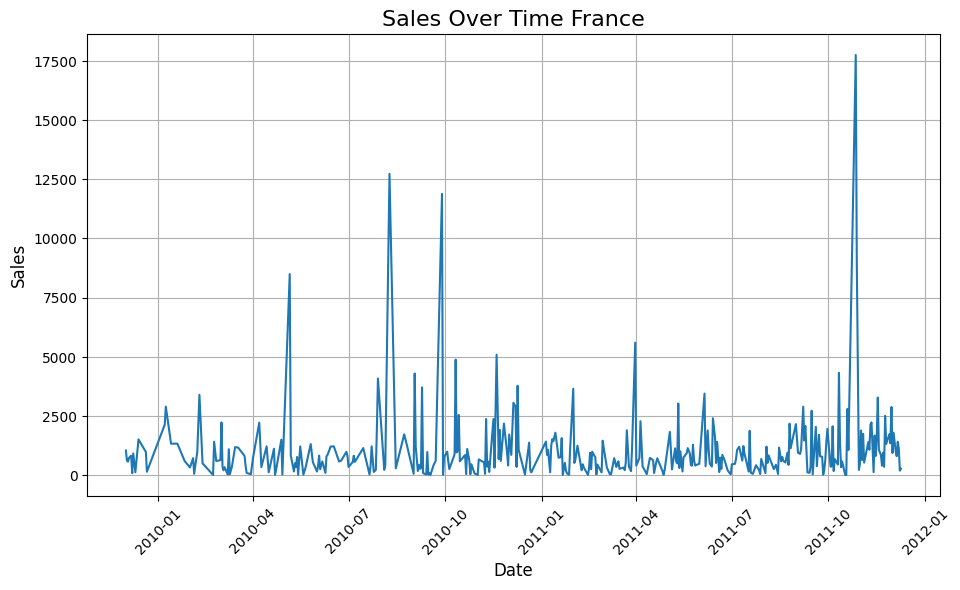

In [16]:
for country in countryWiseData.keys():
    plot_data(countryWiseData[country],country)

In [17]:
for country in countryWiseData.keys():
    print(len(countryWiseData.get(country).index))

604
451
354
370


##### Spliting data for each country as 90 - 10 %

In [51]:
def test_train_split(countryWiseData,test_train_data):
    for country in countryWiseData.keys():
        temp = countryWiseData.get(country)
        size = len(temp.index)
        train = temp.iloc[:int(0.9*size)]
        test = temp.iloc[int(0.9*size)-1:]
        test_train_data[country] = {'test' : test, 'train' : train}
    return test_train_data

In [52]:
test_train_data = {}
test_train_split(countryWiseData,test_train_data)

{'United Kingdom': {'test':                  Sales
  InvoiceDate           
  2011-09-29    44272.58
  2011-09-30    31666.89
  2011-10-02    11593.90
  2011-10-03    64052.89
  2011-10-04    37677.30
  ...                ...
  2011-12-05    56228.02
  2011-12-06    44400.66
  2011-12-07    49563.31
  2011-12-08    47832.43
  2011-12-09   348351.85
  
  [62 rows x 1 columns],
  'train':                  Sales
  InvoiceDate           
  2009-12-01   38504.740
  2009-12-02   45750.370
  2009-12-03   71873.090
  2009-12-04   31728.090
  2009-12-05    9042.360
  ...                ...
  2011-09-25   28911.231
  2011-09-26   27549.571
  2011-09-27   28128.700
  2011-09-28   32382.700
  2011-09-29   44272.580
  
  [543 rows x 1 columns]},
 'Germany': {'test':                Sales
  InvoiceDate         
  2011-10-11    962.99
  2011-10-12   1234.36
  2011-10-13   2211.08
  2011-10-14   3158.28
  2011-10-17   3512.87
  2011-10-18   1315.27
  2011-10-19   2648.36
  2011-10-20   1118.05
  2011-1

In [53]:
test_train_data['United Kingdom'].get('train')

,Sales
InvoiceDate,
2009-12-01,38504.740
2009-12-02,45750.370
2009-12-03,71873.090
2009-12-04,31728.090
2009-12-05,9042.360
...,...
2011-09-25,28911.231
2011-09-26,27549.571
2011-09-27,28128.700


In [54]:
def plot_data(train : pd.DataFrame,test : pd.DataFrame, country):
    plt.figure(figsize = (11, 6))
    plt.plot(train.index , train['Sales'],color='blue', label='Train Data')
    plt.plot(test.index, test['Sales'],color='red', label='Test Data')

    plt.title(f'Sales Over Time {country}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)

    plt.xticks(rotation=45)

    plt.grid(True)
    plt.show()

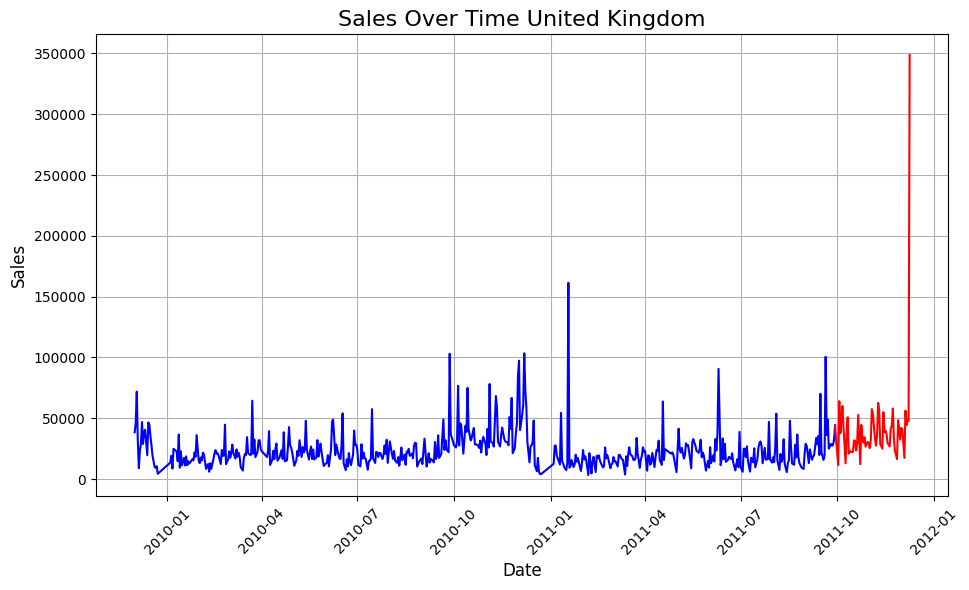

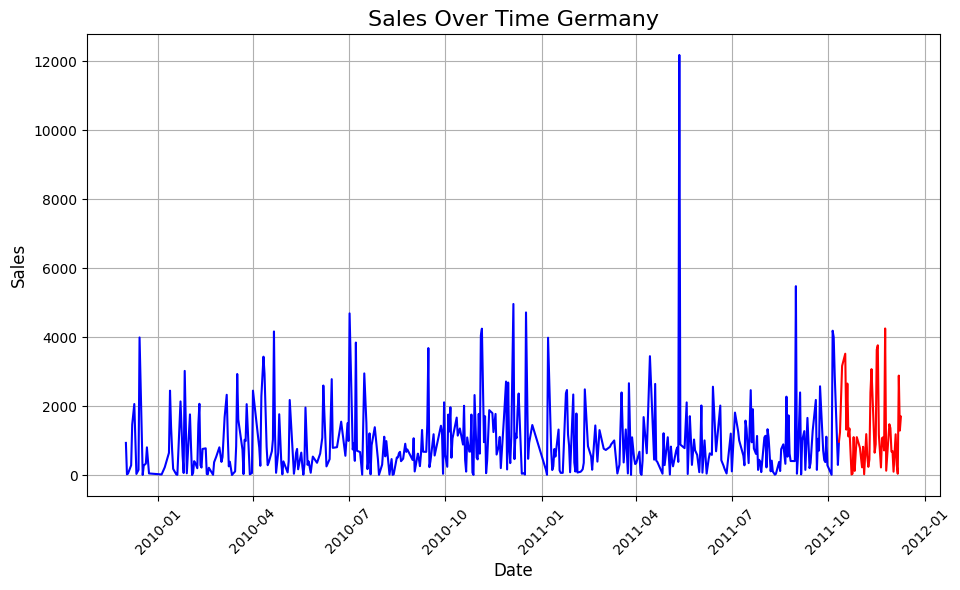

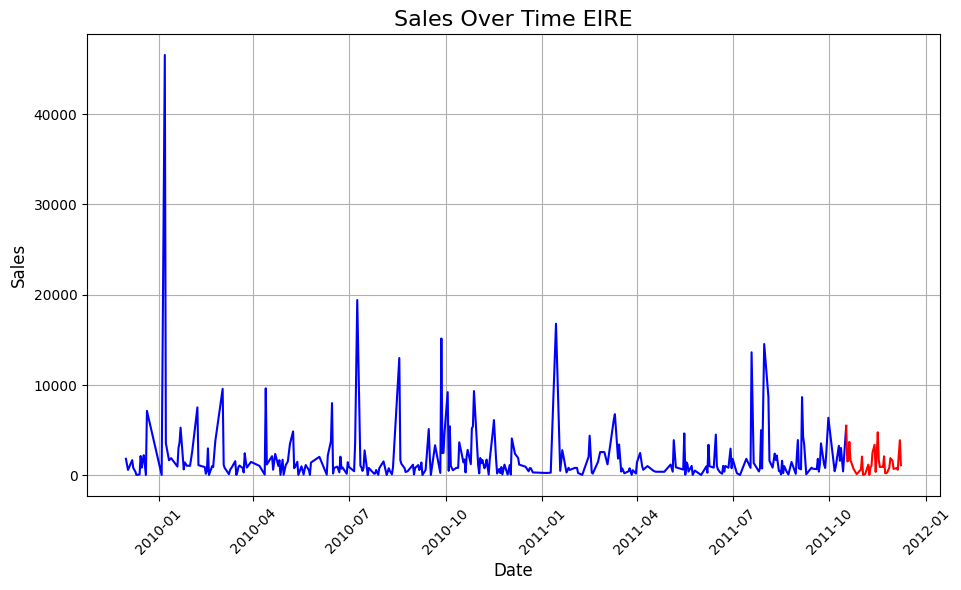

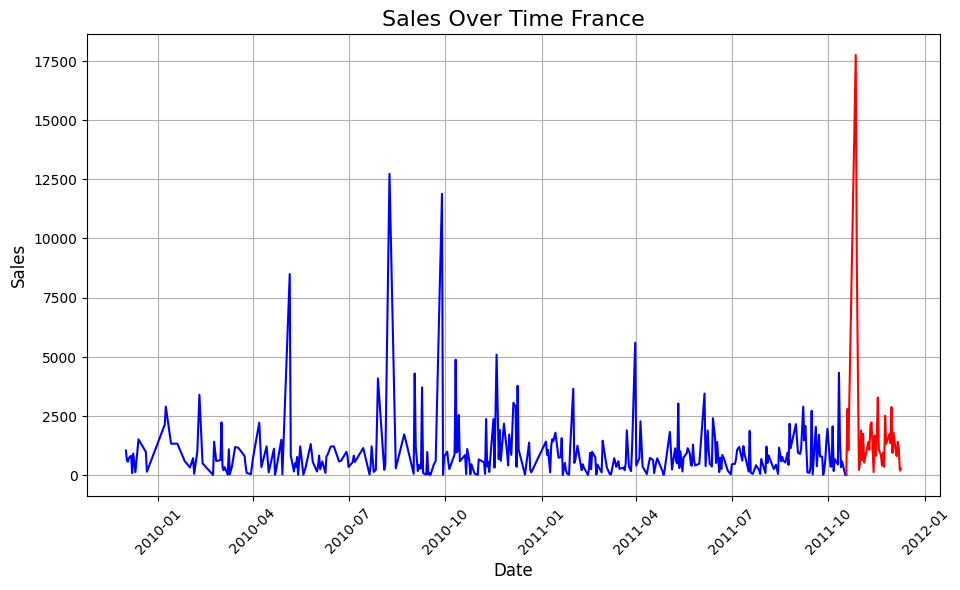

In [55]:
for country in countryWiseData:
    plot_data(test_train_data[country].get('train'), test_train_data[country].get('test'),country)